<a href="https://colab.research.google.com/github/JuanGutierrezP/Juan_Guti-rrez-Joseph_Reyes/blob/main/Parcial2_Joseph_Juan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Integración Punto 24
#Verificación del polo norte
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular nodos y pesos de Gauss-Legendre
def gauss_legendre(N):
    from numpy.polynomial.legendre import leggauss
    return leggauss(N)

# Función para el cálculo de la gravedad con coordenadas
def gk(x, y, z, r, phi):
    k = 1e-6  # Constante de ajuste
    R = 1     # Radio
    sigma = 1  # Densidad superficial uniforme
    return -k * sigma * R**2 * z * r / (x**2 + y**2 + z**2 - 2 * r * x * np.cos(phi) - 2 * r * y * np.sin(phi))**3

# Función para calcular la integral usando cuadratura de Gauss-Legendre
def integral_gk(x, y, z):
    N = 50
    x_gauss, w_gauss = gauss_legendre(N)
    integral = 0
    R_max = 1  # Valor máximo para r

    # Iteramos sobre los nodos de Gauss-Legendre
    for i in range(N):
        r = 0.5 * R_max * (1 + x_gauss[i])  # Rescalamos a [0, R_max]
        for j in range(N):
            # Mapear el punto de [-1, 1] a [0, 2*pi]
            phi = np.pi * (1 + x_gauss[j])  # Rescalamos a [0, 2*pi]
            integral += w_gauss[i] * w_gauss[j] * r * gk(x, y, z, r, phi)

    return integral

# Generar el gráfico de campo gravitacional en el plano xy, con z constante
z_val = 0.2  # Definimos z_val ahora
x_vals = np.linspace(-1, 1, 100)
y_vals = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Calcular la gravedad en cada punto del plano
Z = np.zeros_like(X)
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        Z[i, j] = integral_gk(X[i, j], Y[i, j], z_val)

# Graficar el campo gravitacional
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50 )

plt.title(f'Campo gravitacional en función de $x$ y $y$ con $z={z_val}$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Ejemplo de impresión de un valor específico de la integral
print(integral_gk(0, 0, z_val))

In [ ]:
#Integración Punto 25
#Teórico en PDF(Github, BN)

 Suma por izq : 3.9204
Suma por dere : 4.0804
Suma centrada : 3.9998
Puntos nodales (xi): [0.  0.5 1.  1.5]
Valores de la función f(xi) = x^3: [0.    0.125 1.    3.375]
Integral estimada con n=30: 3.7377777777777776
Integral exacta: 4.0
Error: 0.26222222222222236


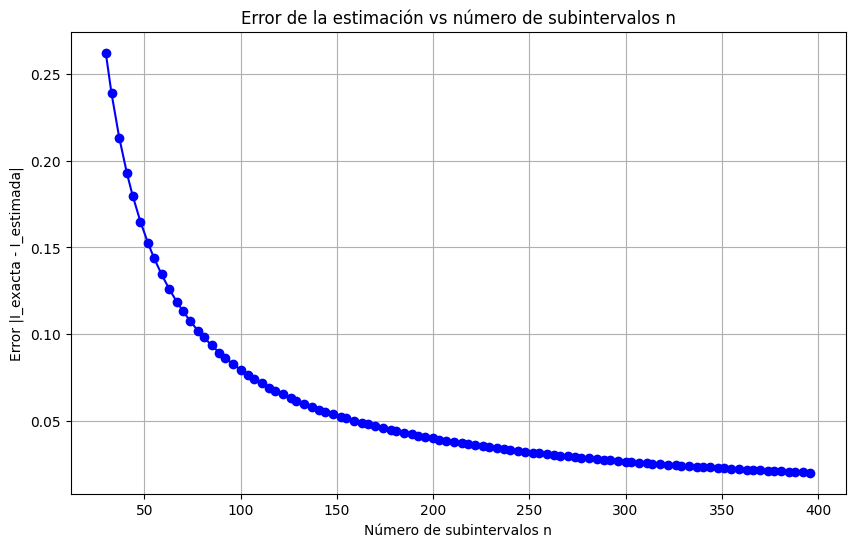

In [ ]:
#Integración Punto 26
#A PDF Github
#B

import numpy as np

def riemann_sum(f, a, b, n, method='left'):
    # n subintervalos
    x = np.linspace(a, b, n + 1)
    dx = (b - a)/ n

    # suma de Riemann
    if method == 'left':
        x_left = x[:-1]                         # Puntos izquierdos
        return np.sum(f(x_left) * dx)
    elif method == 'right':
        x_right = x[1:]                         # Puntos derechos
        return np.sum(f(x_right) * dx)
    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:]) / 2            # Puntos medios
        return np.sum(f(x_mid) * dx)
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")

# Definición de la función, los límites y el número de subintervalos
f = lambda x: x**3
a = 0
b = 2
n = 100

# prints para diferentes métodos
print(" Suma por izq :", riemann_sum(f, a, b, n, 'left'))
print("Suma por dere :", riemann_sum(f, a, b, n, 'right'))
print("Suma centrada :", riemann_sum(f, a, b, n, 'midpoint'))


#C

import numpy as np


# Definir la función f(x) = x^3
f = lambda x: x**3

# Parámetros
a = 0
b = 2
n = 4  # número de subintervalos


dx = (b - a) / n

# Calcular los puntos nodales
x = np.array([a + i * dx for i in range(n)])


f_values = f(x)

# Imprimir los resultados
print("Puntos nodales (xi):", x)
print("Valores de la función f(xi) = x^3:", f_values)


#E
import numpy as np

# Número de subintervalos
n = 30

# Ancho de cada subintervalo
delta_x = 2 / n

# Puntos nodales
i = np.arange(0, n)
x_i = (2 * i) / n

# Valores de la función en los puntos nodales
f_xi = x_i**3

# Suma de Riemann
I_estimada = np.sum(f_xi * delta_x)

# Valor exacto de la integral
I_exacta = (2**4) / 4  # Integral de x^3 dx de 0 a 2

print(f"Integral estimada con n={n}: {I_estimada}")
print(f"Integral exacta: {I_exacta}")
print(f"Error: {abs(I_exacta - I_estimada)}")


#F

import matplotlib.pyplot as plt

# Valores de n
n_values = np.linspace(30, 400, 100, endpoint=False, dtype=int)

# Valor exacto de la integral
I_exacta = (2**4) / 4  # Integral de x^3 dx de 0 a 2

errors = []

for n in n_values:
    delta_x = 2 / n
    i = np.arange(0, n)
    x_i = (2 * i) / n
    f_xi = x_i**3
    I_estimada = np.sum(f_xi * delta_x)
    error = abs(I_exacta - I_estimada)
    errors.append(error)

# Graficar el error
plt.figure(figsize=(10, 6))
plt.plot(n_values, errors, marker='o', linestyle='-', color='b')
plt.title('Error de la estimación vs número de subintervalos n')
plt.xlabel('Número de subintervalos n')
plt.ylabel('Error |I_exacta - I_estimada|')
plt.grid(True)
plt.show()

#G

In [ ]:
#Integración Punto 27

import numpy as np

def F(r):
    w = r[:4]
    x = r[4:]
    F = np.zeros(8)
    F[0] = np.sum(w) - 2
    F[1] = np.dot(w, x)
    F[2] = np.dot(w, x**2) - 2/3
    F[3] = np.dot(w, x**3)
    F[4] = np.dot(w, x**4) - 2/5
    F[5] = np.dot(w, x**5)
    F[6] = np.dot(w, x**6) - 2/7
    F[7] = np.dot(w, x**7)
    return F

def Jacobian(r):
    w = r[:4]
    x = r[4:]
    J = np.zeros((8,8))
    J[0, 0:4] = 1
    J[1, 0:4] = x
    J[1, 4:8] = w
    J[2, 0:4] = x**2
    J[2, 4:8] = 2 * w * x
    J[3, 0:4] = x**3
    J[3, 4:8] = 3 * w * x**2
    J[4, 0:4] = x**4
    J[4, 4:8] = 4 * w * x**3
    J[5, 0:4] = x**5
    J[5, 4:8] = 5 * w * x**4
    J[6, 0:4] = x**6
    J[6, 4:8] = 6 * w * x**5
    J[7, 0:4] = x**7
    J[7, 4:8] = 7 * w * x**6
    return J

# Método del descenso del gradiente
r = np.random.uniform(-1., 1., size=8)
gamma = 0.01
tolerance = 1e-6
max_iter = 10000

for iteration in range(max_iter):
    F_r = F(r)
    metric = np.linalg.norm(F_r)
    if metric < 0.005 and gamma == 0.01:
        gamma = 0.001
    if metric < tolerance:
        print(f"Convergió en {iteration} iteraciones.")
        break
    J_r = Jacobian(r)
    grad_E = np.dot(J_r.T, F_r)
    r = r - gamma * grad_E
else:
    print("No convergió dentro del número máximo de iteraciones.")
w = r[:4]
x = r[4:]

# Estimación de la integral
I_approx = np.dot(w, np.cos(x))
I_exact = 2 * np.sin(1)

print(f"Pesos w: {w}")
print(f"Puntos x: {x}")
print(f"Integral aproximada: {I_approx}")
print(f"Integral exacta: {I_exact}")
print(f"Error: {abs(I_approx - I_exact)}")

"""
La baja precisión en la estimación de la integral
se debe a que la cuadratura de Gauss es exacta
para polinomios hasta grado 2N−1, pero cos(x) no es
un polinomio y su comportamiento no es capturado completamente
por la cuadratura de 4 puntos.
"""


No convergió dentro del número máximo de iteraciones.
Pesos w: [ 0.70218878  0.52114412  0.97462308 -0.19802062]
Puntos x: [ 0.78022893 -0.79737369  0.00777003  0.70577979]
Integral aproximada: 1.6870265995611096
Integral exacta: 1.682941969615793
Error: 0.0040846299453165535


'\nLa baja precisión en la estimación de la integral\nse debe a que la cuadratura de Gauss es exacta\npara polinomios hasta grado 2N−1, pero cos(x) no es\nun polinomio y su comportamiento no es capturado completamente\npor la cuadratura de 4 puntos.\n'

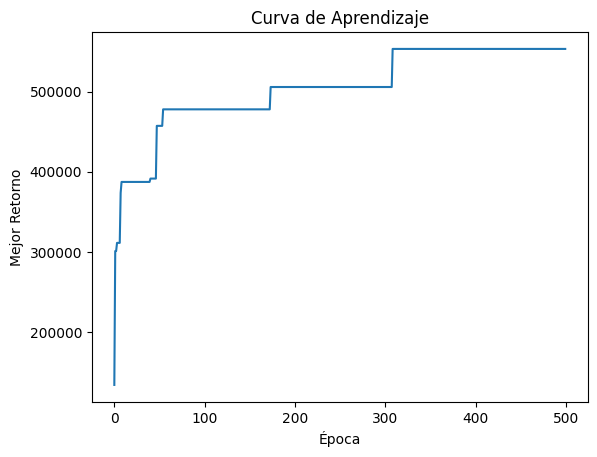

Inversiones en cada opción:
Opción 1: $197679.10
Opción 2: $161240.35
Opción 3: $133796.45
Opción 4: $146735.76
Opción 5: $108321.37
Opción 6: $106505.97
Opción 7: $79004.59
Opción 8: $66716.40

Retornos posibles:
Evento 1: $682249.14
Evento 2: $722046.95
Evento 3: $637668.52
Evento 4: $1004410.54
Evento 5: $664899.53
Evento 6: $826577.43
Evento 7: $553230.25
Evento 8: $647227.87

Retorno mínimo: $553230.25
Retorno máximo: $1004410.54

Se gana dinero en todos los escenarios.


In [ ]:
#Estrategia de mejor inversión (algoritmo genético R^{8})
import numpy as np
import matplotlib.pyplot as plt

# Definir la función objetivo
def F(robot):
    returns = robot.Ca * (np.multiply(robot.r, robot.C) - 1)
    return np.min(returns)
# Clase Robot
class Robot:
    def __init__(self, f, Id, C, Ca, rate=0.1):

        self.Id = Id
        self.f = f  # La función objetivo
        self.C = C  # Vector de cuotas
        self.Ca = Ca  # Capital disponible
        self.rate = rate  # Tasa de mutación

        # Inicializar el vector de pesos r
        self.r = np.random.uniform(0., 1., size=C.shape[0])
        # Normalización inicial
        self.r = self.r / np.sum(self.r)

    def evaluate(self):
        # Calcula el retorno mínimo usando la función f
        return self.f(self)

    def mutate(self):
        # Aplica mutaciones al vector de pesos
        self.r += np.random.normal(loc=0., scale=self.rate, size=self.C.shape[0])
        # Asegura que no haya valores negativos
        self.r = np.abs(self.r)
        # Normaliza para que la suma sea 1
        self.r = self.r / np.sum(self.r)

# lista de robots
def GetRobots(N, f, C, Ca, rate=0.1):
    Robots = []

    for i in range(N):
        r = Robot(f, i, C, Ca, rate)
        Robots.append(r)

    return Robots

# Parámetros del problema
C = np.array([8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69])
Ca = 1_000_000
N = 500
epochs = 500
rate = 0.1
Robots = GetRobots(N, F, C, Ca, rate)

best_returns = []
best_robot = None

for epoch in range(epochs):
    # Evaluar a cada robot
    fitness = [robot.evaluate() for robot in Robots]

    # Encontrar el mejor retorno y el mejor robot
    max_return = max(fitness)
    best_returns.append(max_return)

    # Ordenar robots por fitness
    sorted_indices = np.argsort(fitness)[::-1]
    Robots = [Robots[i] for i in sorted_indices]

    # Seleccionar la élite
    elite_size = int(0.1 * N)
    elites = Robots[:elite_size]

    # Generar nueva población
    new_population = elites.copy()
    while len(new_population) < N:
        # Selección aleatoria de padres de la élite
        parent = np.random.choice(elites)
        # Crear un hijo clonando al padre
        child = Robot(F, parent.Id, C, Ca, rate)
        child.r = parent.r.copy()
        # Mutar al hijo
        child.mutate()
        # Agregar el hijo a la nueva población
        new_population.append(child)

    Robots = new_population.copy()

    # Actualizar el mejor robot
    if best_robot is None or max_return > F(best_robot):
        best_robot = Robots[0]

# Graficar la curva de aprendizaje
plt.plot(best_returns)
plt.xlabel('Época')
plt.ylabel('Mejor Retorno')
plt.title('Curva de Aprendizaje')
plt.show()

# Mostrar los resultados finales
investments = best_robot.r * Ca
print("Inversiones en cada opción:")
for i, inv in enumerate(investments):
    print(f"Opción {i+1}: ${inv:.2f}")

possible_returns = Ca * (np.multiply(best_robot.r, C) - 1)
print("\nRetornos posibles: ")
for i, ret in enumerate(possible_returns):
    print(f"Evento {i+1}: ${ret:.2f}")

min_return = np.min(possible_returns)
max_return = np.max(possible_returns)
print(f"\nRetorno mínimo: ${min_return:.2f}")
print(f"Retorno máximo: ${max_return:.2f}")

if min_return > 0:
    print("\nSe gana dinero en todos los escenarios.")
else:
    print("\nNo se garantiza ganar dinero en todos los escenarios.")